In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import pandas as pd
import csv
import sys
from pathlib import Path

# test

import matplotlib.pyplot as plt
%matplotlib inline

# path to stylegan encoder on server
sys.path.insert(1, '/home/shavit/APhotoADay/data/stylegan-encoder')

import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

from IPython.display import Markdown, display

from IPython.display import Markdown, display

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

InvalidArgumentError: Cannot assign a device for operation 'learnable_dlatents/read': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: learnable_dlatents/read = Identity[T=DT_FLOAT, _class=["loc:@learnable_dlatents"], _device="/device:GPU:0"](learnable_dlatents)]]

Caused by op 'learnable_dlatents/read', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/shavit/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/home/shavit/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/shavit/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/shavit/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/shavit/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/home/shavit/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/shavit/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/shavit/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/shavit/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-5b8e6e491508>", line 7, in <module>
    generator = Generator(Gs_network, batch_size=1, randomize_noise=False)
  File "/home/shavit/APhotoADay/data/stylegan-encoder/encoder/generator_model.py", line 27, in __init__
    structure='fixed')
  File "/home/shavit/APhotoADay/data/stylegan-encoder/dnnlib/tflib/network.py", line 406, in run
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]
  File "/home/shavit/APhotoADay/data/stylegan-encoder/dnnlib/tflib/network.py", line 406, in <listcomp>
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]
  File "/home/shavit/APhotoADay/data/stylegan-encoder/encoder/generator_model.py", line 15, in create_variable_for_generator
    initializer=tf.initializers.random_normal())
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1467, in get_variable
    aggregation=aggregation)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1217, in get_variable
    aggregation=aggregation)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 527, in get_variable
    aggregation=aggregation)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 481, in _true_getter
    aggregation=aggregation)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 903, in _get_single_variable
    aggregation=aggregation)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2443, in variable
    aggregation=aggregation)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2425, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2406, in default_variable_creator
    constraint=constraint)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 259, in __init__
    constraint=constraint)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 422, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 80, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3264, in identity
    "Identity", input=input, name=name)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/shavit/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'learnable_dlatents/read': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: learnable_dlatents/read = Identity[T=DT_FLOAT, _class=["loc:@learnable_dlatents"], _device="/device:GPU:0"](learnable_dlatents)]]


In [5]:
def generate_image(latent_vector, size):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((size, size))

def show(latent_vector):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    ax[i].imshow(generate_image(latent_vector))
    ax[i].set_title(latent_vector)
    [x.axis('off') for x in ax]
    plt.show()

In [20]:
#    Given a data set of the form
#    ((original photo, original age, target age), target photo)
#    We take some part of the data set and use it to train a linear model
#    We reserve some of the data to test it afterwards

#    photos should be npy
#    input = lists of the data (should all be the same size and flattened)
#    output = linear regression interpolator
#    note that data can come from multiple people, the more data, the more accurate

def findRegressor(start_photos, start_ages, target_ages, target_photos):

    X = []
    Y = []

    for i in range(len(start_photos)):
        X.append(np.concatenate([start_photos[i], start_ages[i], target_ages[i]], axis=None))
        Y.append(target_photos[i])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    regressor = LinearRegression(copy_X = True)  
    regressor.fit(X_train, Y_train)

    #print("accuracy = " + str(testModel(X_train, Y_train, regressor)))

    return regressor, X_test, Y_test, X_train, Y_train

#    input = list of data to test on and regressor to test
#    output = accuracy in MSE
def testModel(X, Y, regressor):

    Y_pred = regressor.predict (X)
    return Y_pred

In [13]:
# TESTING FROM HERE DOWN REMOVE THIS DURING USE #

# data1 = []
# data2 = []
# data3 = []

# results = []
# for i in range(1000):
#     data1.append(np.array(np.random.rand()))
#     data2.append(np.array(np.random.rand()))
#     data3.append(np.array(np.random.rand()))
#     results.append(np.array([np.power(data1[i], 1),data2[i], data3[i]]))

# print(np.around(data1, decimals=3))
# print(np.around(data2, decimals=3))
# print(np.around(data3, decimals=3))
# print(np.around(results, decimals=3))

# regressor, X_test, Y_test = findInterpolator(data1, data2, data3, results)

# print (testModel(X_test, Y_test, regressor))

0.019556502
0.020243544


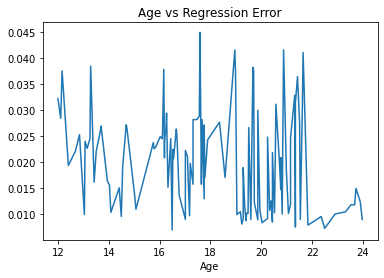

In [22]:
# Receive input

os.chdir("/home/shavit/APhotoADay/True_vs_Learned")

num_of_people = int(input("Enter number of people: "))

paths = []

for person in range(num_of_people):
    paths.append("regression_data/" + input("Enter path for data for person " + str(person + 1) + ": "))
    paths.append("regression_data/video" + str(person + 1))
    
start_photos = []
start_ages = []
target_ages = []
target_photos = []

first = []
first_age = []

for person in range(num_of_people):
    unsorted_files = os.listdir(paths[person])
    naked_files = sorted(unsorted_files, key=lambda x: int(os.path.splitext(x)[0]))
    
    files = []
    
    for file in naked_files:
        files.append(paths[person] + "/" + file)
    
    first.append(np.load(files[0]).flatten())
    first_age.append(int(Path(files[0]).stem))
    
    for i in range(len(files)):
        start_photos.append(first[person])
        start_ages.append(first_age[person])
        target_ages.append(int(Path(files[i]).stem))
        target_photos.append(np.load(files[i]).flatten())
        
#for i in range (len(start_photos):
#    print(start_photos[i], start_ages[i], target_ages[i], target_photos[i])
    
regressor, X_test, Y_test, X_train, Y_train = findRegressor(start_photos, start_ages, target_ages, target_photos)

Y_pred = testModel(X_test, Y_test, regressor)
MSE = metrics.mean_squared_error (Y_test, Y_pred)
MSE_train = metrics.mean_squared_error (regressor.predict(X_train), Y_train)

print (MSE_train)
print (MSE)

# print (X_test[0].shape)

# New code
age_specific_MSE = []

for i, age in enumerate(Y_pred):
    this_MSE = metrics.mean_squared_error (np.array(Y_pred[i]), np.array(Y_test[i]))
    age_specific_MSE.append([X_test[i][9217], this_MSE])

age_specific_MSE.sort()

# print (age_specific_MSE)

graph_name = "regression_data/graphs/graph1"
csv_file = graph_name + ".csv"

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Age", "MSE"])
    
    for age, mse in age_specific_MSE:
        writer.writerow([(age / 365.0), mse])

# Display and save plot

data = pd.read_csv(csv_file).set_index('Age')
data_plot = data.plot(title = "Age vs Regression Error", legend = None)

data_plot.get_figure().savefig(graph_name + ".png")

In [24]:
# generate examples


# experiment = "video" + num_of_vid + "_plot_" + str(start_age) + "_to_" + str(end_age) + "_batch=" + str(averaging_ratio) + "_dimensions=" + ("default" if (num_dimensions == 0) else str(num_dimensions)) + "_method=" + ("standard" if (method == 0) else ("puzer" if (method == 1) else "regression"))
# printmd("\n\n**Running experiment: " + experiment + "**", color="blue")

# if not os.path.exists("Results/" + experiment):
#     os.mkdir("Results/" + experiment)

In [8]:
# Video from given picture, using our data (which specific data exactly?)

t_start_photos = []
t_start_ages = []
t_target_ages = []
    
t_first = np.load("regression_data/test/kobi.npy").flatten()
t_first_age = int(input("Enter your age (years): ")) * 365

for i in range (t_first_age, t_first_age * 2, 10):
    t_start_photos.append(t_first)
    t_start_ages.append(t_first_age)
    t_target_ages.append(i)

t_X = []
for i in range(len(t_start_photos)):
    t_X.append(np.concatenate([t_start_photos[i], t_start_ages[i], t_target_ages[i]], axis=None))

results_path = "regression_data/results"

t_Y = regressor.predict(t_X)

if not os.path.exists(results_path):
    os.mkdir(results_path)

for i, prediction in enumerate(t_Y):
    img = generate_image(prediction, 512)
    img.save(results_path + "/" + str(i) + ".png")

KeyboardInterrupt: Interrupted by user

In [27]:
# Display GIFs. This is --NOT-- Python code; It should be run from termianl.

# python3 ../rename3.py . 0

# ffmpeg -f image2 -framerate 75 -pattern_type sequence -start_number 0 -r 2 -i %d.png -vcodec libx264 -acodec aac real_broken.mp4

# ffmpeg -i real_broken.mp4 -c:v libx264 -profile:v baseline -level 3.0 -pix_fmt yuv420p real.mp4

# ffmpeg -itsscale 0.027 -i real.mp4 -c copy real_output.mp4

In [28]:
# Older attempt at displaying GIFs

# def gif_create(delay, path_to_frames, output):
#     os.system("convert -delay " + delay + " -loop 0 " + path_to_frames + "/*.png Results/" + experiment + "/" + output + ".gif")

# gif_create("10", real_data_path, "real")
# gif_create("10", fake_data_path, "fake")